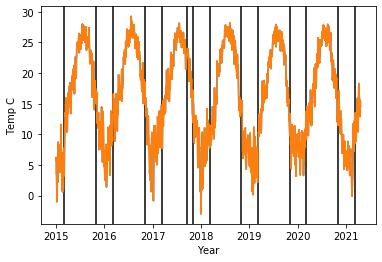

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("timeseries_added_lat_lon.csv", parse_dates=["Date"])

# Daily mean temperature with black lines marking days of projected temperature due to missing data
plot = sns.lineplot(data=df, x="Date", y="Mean Temp C")
plot.set(xlabel='Year', ylabel='Temp C')
for index, row in df.iterrows():
    if (row["Projected"]):
        plt.axvline(x=row["Date"], color="black")
plot = sns.lineplot(data=df, x="Date", y="Mean Temp C")

[Text(0, 0.5, 'Temp C'), Text(0.5, 0, 'Year')]

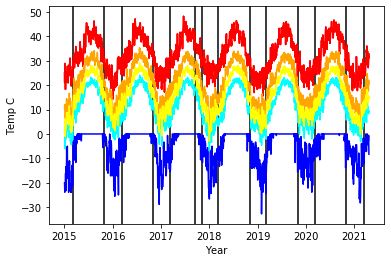

In [77]:
# Daily mean, mean max, mean min, absolute min, and absolute max temperatures with black lines marking days of projected temperature
sns.lineplot(data=df, x="Date", y="Abs Max Temp C", color='red')
for index, row in df.iterrows():
    if (row["Projected"]):
        plt.axvline(x=row["Date"], color="black")
sns.lineplot(data=df, x="Date", y="Abs Max Temp C", color='red')
sns.lineplot(data=df, x="Date", y="Abs Min Temp C", color='blue')
sns.lineplot(data=df, x="Date", y="Mean Min Temp C", color='cyan')
sns.lineplot(data=df, x="Date", y="Mean Max Temp C", color='orange')
plot = sns.lineplot(data=df, x="Date", y="Mean Temp C", color='yellow')
plot.set(xlabel='Year', ylabel='Temp C')

[Text(0, 0.5, 'Temp C'), Text(0.5, 0, 'Year')]

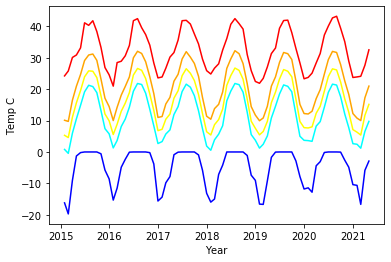

In [78]:
# Monthly Averages Over Years
monthly = df.groupby(pd.Grouper(key="Date", freq="1M"))

mean = monthly["Mean Temp C"].mean()
mean_min = monthly["Mean Min Temp C"].mean()
mean_max = monthly["Mean Max Temp C"].mean()
abs_max = monthly["Abs Max Temp C"].mean()
abs_min = monthly["Abs Min Temp C"].mean()

sns.lineplot(x=abs_max.index, y=abs_max.values, color='red')
sns.lineplot(x=abs_min.index, y=abs_min.values, color='blue')
sns.lineplot(x=mean_max.index, y=mean_max.values, color='orange')
sns.lineplot(x=mean_min.index, y=mean_min.values, color='cyan')
plot = sns.lineplot(x=mean.index, y=mean.values, color='yellow')
plot.set(xlabel='Year', ylabel='Temp C')

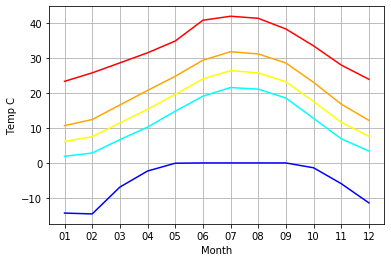

In [84]:
# Monthly Average
import numpy as np

monthly = df.groupby(df['Date'].dt.strftime('%m'))

mean = monthly["Mean Temp C"].mean()
mean_min = monthly["Mean Min Temp C"].mean()
mean_max = monthly["Mean Max Temp C"].mean()
abs_max = monthly["Abs Max Temp C"].mean()
abs_min = monthly["Abs Min Temp C"].mean()

sns.lineplot(x=abs_max.index, y=abs_max.values, color='red')
sns.lineplot(x=abs_min.index, y=abs_min.values, color='blue')
sns.lineplot(x=mean_max.index, y=mean_max.values, color='orange')
sns.lineplot(x=mean_min.index, y=mean_min.values, color='cyan')
ax = sns.lineplot(x=mean.index, y=mean.values, color='yellow')

ax.set(xlabel='Month', ylabel='Temp C')

ax.grid()

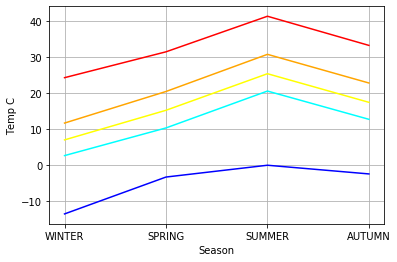

In [111]:
# Seasonal Average
import numpy as np

lookup = { "01":"WINTER", "02":"WINTER", "03":"SPRING", 
           "04":"SPRING", "05":"SPRING", "06":"SUMMER",
           "07":"SUMMER", "08":"SUMMER", "09":"AUTUMN", 
           "10":"AUTUMN", "11":"AUTUMN", "12":"WINTER"}

monthly = df.groupby(df['Date'].dt.strftime('%m'))

season = []
for index, row in df.iterrows():
    season.append(lookup[row["Date"].strftime('%m')])
    
df["Season"] = pd.Categorical(season, categories=["WINTER", "SPRING", "SUMMER", "AUTUMN"], ordered=True)

seasonal = df.groupby(df['Season'])

mean = seasonal["Mean Temp C"].mean()
mean_min = seasonal["Mean Min Temp C"].mean()
mean_max = seasonal["Mean Max Temp C"].mean()
abs_max = seasonal["Abs Max Temp C"].mean()
abs_min = seasonal["Abs Min Temp C"].mean()

sns.lineplot(x=abs_max.index, y=abs_max.values, color='red', sort=False)
sns.lineplot(x=abs_min.index, y=abs_min.values, color='blue')
sns.lineplot(x=mean_max.index, y=mean_max.values, color='orange')
sns.lineplot(x=mean_min.index, y=mean_min.values, color='cyan')
ax = sns.lineplot(x=mean.index, y=mean.values, color='yellow')

ax.set(xlabel='Season', ylabel='Temp C')

ax.grid()